# DSCI 235 (Data Wrangling) Final Project

Data Source: https://github.com/ErikaJacobs/AnimalCrossing_PopularityData/blob/master/villagers.csv

GitHub: https://github.com/eryn-wheeler/DSCI-235-Final-Project

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%autosave 60

Autosaving every 60 seconds


## Project Description

The video game Animal Crossing: New Horizons is about going to a deserted island getaway with two other animal villagers and build and landscaping the island to your liking. This current entry in the Animal Crossing franchise was released on March 20th, 2020, prime time when the Coronavirus lockdown. Like others, I put ton of hours into the game created my own island. The game also gave me a sense of a schedule during the summer time during lockdown since the game works on real time that your Nintendo Switch system uses.  
 
What interests me about this dataset is how many villagers the player can invite to live on their island. The game holds 392 villagers that range from different species, personalities, styles, designs, personalities, and more. This offers different patterns to be discovered, especially by species. So I want to answer the following questions below.

This notebook will answer the following questions:

1. How many species of each type are present in the game?
* 1a. Which species has the highest count?
* 1b. What is the count of males and females in each species?

2. What is the most common personality of each species?
* 2a. What is the total number of villagers in each personality type
* 2b. Which species has the highest count of each personality type?

3. What is the most common hobby for each species?



# Gathering The Data

I will now gather the raw dataset from the GitHub source link. 

In [108]:
animal_dataset = pd.read_csv("https://raw.githubusercontent.com/ErikaJacobs/AnimalCrossing_PopularityData/master/villagers.csv")
animal_dataset.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


# Cleaning The Data

Now that we have the data imported, I realized there are a few columns that are unnecessary for analyzing. 
These columns include: 
* Birthday 
* Catchphrase 
* Favorite Song
* Style 1 & 2
* Color 1 & 2
* Wallpaper
* Flooring 
* Furniture List 
* Filename
* Unique Entry ID. 

In [109]:
villagers = animal_dataset[['Name', 'Species', 'Gender', 'Personality', 'Hobby']]
villagers.head()

,Name,Species,Gender,Personality,Hobby
0,Admiral,Bird,Male,Cranky,Nature
1,Agent S,Squirrel,Female,Peppy,Fitness
2,Agnes,Pig,Female,Big Sister,Play
3,Al,Gorilla,Male,Lazy,Fitness
4,Alfonso,Alligator,Male,Lazy,Play


Now that our data is more organized and we can see what we are working with, I think it will be suitable to create separate dataframes for each species to get ready to answer our first question. This means we need 35 dataframes, one for each animal species present in the game. 

In [123]:
alligator = villagers.loc[villagers['Species'] == 'Alligator']
anteater = villagers.loc[villagers['Species'] == 'Anteater']
bear = villagers.loc[villagers['Species'] == 'Bear']
bird = villagers.loc[villagers['Species'] == 'Bird']
bull = villagers.loc[villagers['Species'] == 'Bull']
cat = villagers.loc[villagers['Species'] == 'Cat']
chicken = villagers.loc[villagers['Species'] == 'Chicken']
cow = villagers.loc[villagers['Species'] == 'Cow']
cub = villagers.loc[villagers['Species'] == 'Cub']
deer = villagers.loc[villagers['Species'] == 'Deer']
dog = villagers.loc[villagers['Species'] == 'Dog']
duck = villagers.loc[villagers['Species'] == 'Duck']
eagle = villagers.loc[villagers['Species'] == 'Eagle']
elephant = villagers.loc[villagers['Species'] == 'Elephant']
frog = villagers.loc[villagers['Species'] == 'Frog']
goat = villagers.loc[villagers['Species'] == 'Goat']
gorilla = villagers.loc[villagers['Species'] == 'Gorilla']
hamster = villagers.loc[villagers['Species'] == 'Hamster']
hippo = villagers.loc[villagers['Species'] == 'Hippo']
horse = villagers.loc[villagers['Species'] == 'Horse']
kangaroo = villagers.loc[villagers['Species'] == 'Kangaroo']
koala = villagers.loc[villagers['Species'] == 'Koala']
lion = villagers.loc[villagers['Species'] == 'Lion']
monkey = villagers.loc[villagers['Species'] == 'Monkey']
mouse = villagers.loc[villagers['Species'] == 'Mouse']
octopus = villagers.loc[villagers['Species'] == 'Octopus']
ostrich = villagers.loc[villagers['Species'] == 'Ostrich']
penguin = villagers.loc[villagers['Species'] == 'Penguin']
pig = villagers.loc[villagers['Species'] == 'Pig']
rabbit = villagers.loc[villagers['Species'] == 'Rabbit']
rhino = villagers.loc[villagers['Species'] == 'Rhino']
sheep = villagers.loc[villagers['Species'] == 'Sheep']
squirrel = villagers.loc[villagers['Species'] == 'Squirrel']
tiger = villagers.loc[villagers['Species'] == 'Tiger']
wolf = villagers.loc[villagers['Species'] == 'Wolf']

species_Color = [
    '#326941', #Alligators
    '#C96F14', #Anteaters
    '#633E18', #Bears
    '#34A884', #Birds
    '#D61E1E', #Bulls
    '#C91885', #Cats
    '#C7401E', #Chickens
    '#744EB5', #Cows
    '#499BD1', #Cubs
    '#84C472', #Deer
    '#FF7817', #Doggos
    '#F5CE0F', #Ducks
    '#AD700E', #Eagles
    '#B02E39', #Elephants
    '#1ED48E', #Frogs
    '#14519C', #Goats
    '#851F0D', #Gorillas
    '#AB701F', #Hamsters
    '#1C20A3', #Hippos
    '#811CA3', #Horses
    '#A2d44C', #Kangaroos
    '#B5A05B', #Koalas
    '#B5A05B', #Lions
    '#7A1511', #Monkeys
    '#4F4545', #Mice
    '#5F3A9E', #Octopuses
    '#A84D93', #Ostriches
    '#E69855', #Penguins
    '#D188B7', #Pigs
    '#88B3D1', #Rabbits
    '#184219', #Rhinos
    '#C39CF7', #Sheep
    '#825439', #Squirrels
    '#Bf8211', #Tigers
    '#1C3366', #Wolves
]

Now that our data is sorted into 35 different for each species and we made a color array for each species type we can go ahead and answer our first question in this report. 

# 1. How Many Villagers of Each Species Type is in The Game?

The first main question I want to answer os how many villagers of each species is in the game. Before, we saw that the games hold 35 different animal villagers that the player can invite to their island. I feel finding the count of each villager species, making a dictionary and creating one big bar graph from our dictionary will provide a good visual to answer this question. 

In [124]:
countAlligator = alligator['Species'].count()
countAnteater = anteater['Species'].count()
countBear = bear['Species'].count()
countBird = bird['Species'].count()
countBull = bull['Species'].count()
countCat = cat['Species'].count()
countChicken = chicken['Species'].count()
countCow = cow['Species'].count()
countCub = cub['Species'].count()
countDeer = deer['Species'].count()
countDog = dog['Species'].count()
countDuck = duck['Species'].count()
countEagle = eagle['Species'].count()
countElephant = elephant['Species'].count()
countFrog = frog['Species'].count()
countGoat = goat['Species'].count()
countGorilla = gorilla['Species'].count()
countHamster = hamster['Species'].count()
countHippo = hippo['Species'].count()
countHorse = horse['Species'].count()
countKangaroo = kangaroo['Species'].count()
countKoala = koala['Species'].count()
countLion = lion['Species'].count()
countMonkey = monkey['Species'].count()
countMouse = mouse['Species'].count()
countOcto = octopus['Species'].count()
countOst = ostrich['Species'].count()
countPen = penguin['Species'].count()
countPig = pig['Species'].count()
countRabbit = rabbit['Species'].count()
countRhino = rhino['Species'].count()
countSheep = sheep['Species'].count()
countSquirrel = squirrel['Species'].count()
countTiger = tiger['Species'].count()
countWolf = wolf['Species'].count()


villagerCount_dict = {'Alligators': countAlligator,
                      'Anteaters': countAnteater,
                      'Bears': countBear,
                      'Birds': countBird,
                      'Bulls': countBull,
                      'Cats': countCat,
                      'Chickens': countChicken,
                      'Cows': countCow,
                      'Cubs': countCub,
                      'Deer': countDeer,
                      'Dogs': countDog,
                      'Ducks': countDuck,
                      'Eagles': countEagle,
                      'Elephants': countElephant,
                      'Frogs': countFrog,
                      'Goats': countGoat,
                      'Gorillas': countGorilla,
                      'Hamsters': countHamster,
                      'Hippos': countHippo,
                      'Horses': countHorse,
                      'Kangaroos': countKangaroo,
                      'Koalas': countKoala,
                      'Lions': countLion,
                      'Monkeys': countMonkey,
                      'Mice': countMouse,
                      'Octopuses': countOcto,
                      'Ostriches': countOst,
                      'Penguins': countPen,
                      'Pigs': countPig,
                      'Rabbits': countRabbit,
                      'Rhinos': countRhino,
                      'Sheep': countSheep,
                      'Squirrels': countSquirrel,
                      'Tigers': countTiger,
                      'Wolves': countWolf
                      }

<BarContainer object of 35 artists>

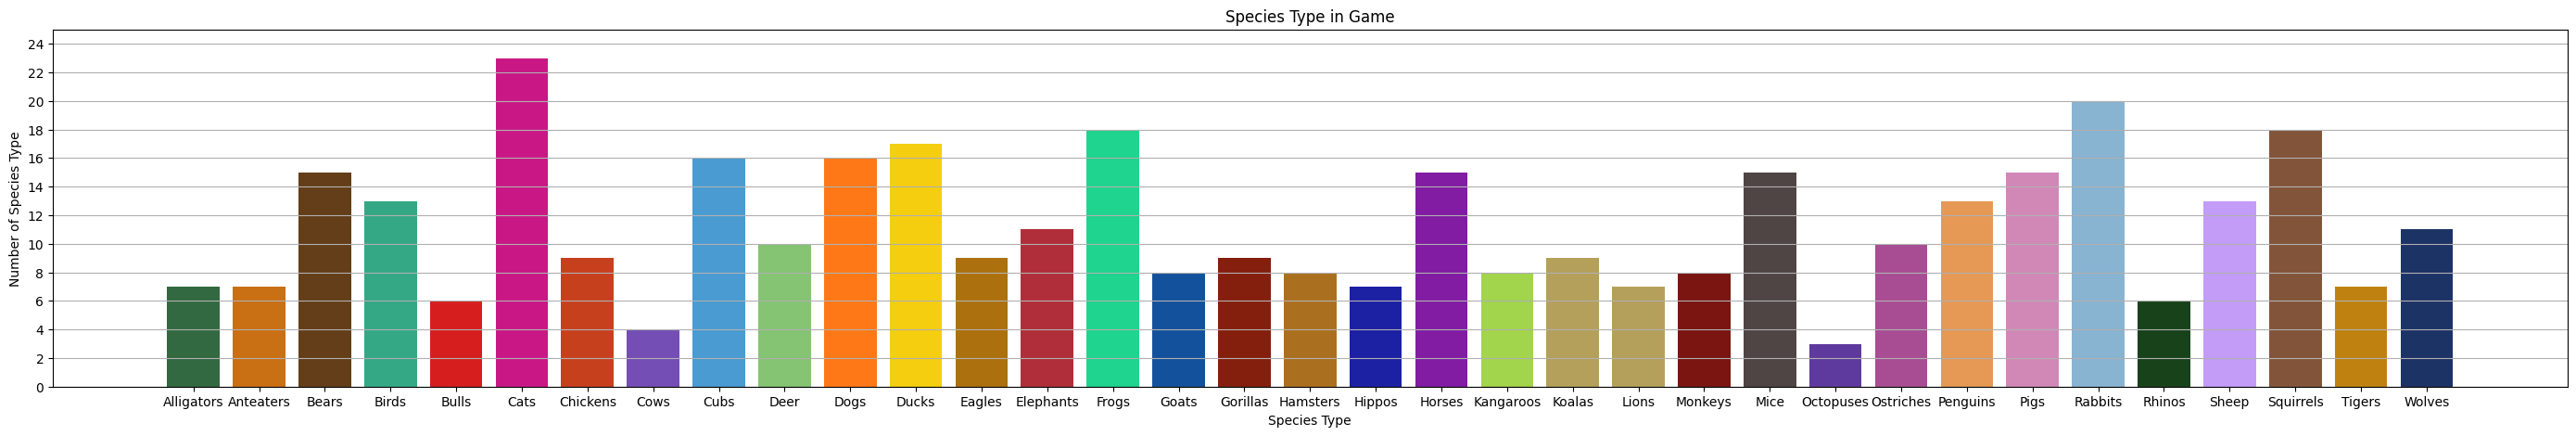

In [112]:
#matplot time :)
plt.figure(figsize=(35, 5))

species = list(villagerCount_dict.keys())
speciesCount = list(villagerCount_dict.values())

plt.ylim(0,25)
plt.yticks(range(0, 25, 2))
plt.xlabel("Species Type")
plt.ylabel("Number of Species Type")
plt.title("Species Type in Game")
plt.grid(axis= 'y', alpha = 1.0)

plt.bar(species,speciesCount, color=species_Color)

#### **Outcome of 1 and 1a:**

From observing our bar graph we can see a good variety of how many villagers are in each species! There's also a few outliers that have very few villagers representing their species such as cows, octopuses and rhinos. 

But from observing this bar graph we can also our 1a question: Which species has the highest count? Our species with the highest villager count are the cat villagers with a current max of **23 villagers**. 

We can also observe that rabbits is the second most villager with **20 villagers** present in the game with squirrels and frogs as a tie for third most villagers with **18 villagers** present.

#### **1b. What is the count of males and females in each species?**

Next, were going to answer our second sub-question in part 1. The way I plan on calculating the count of males and females in each species is by making seperate dictionaries for each species that grabs the male and female count in each. These dictionaries will be used to make bar graphs for each species for a clear visual. 

<BarContainer object of 2 artists>

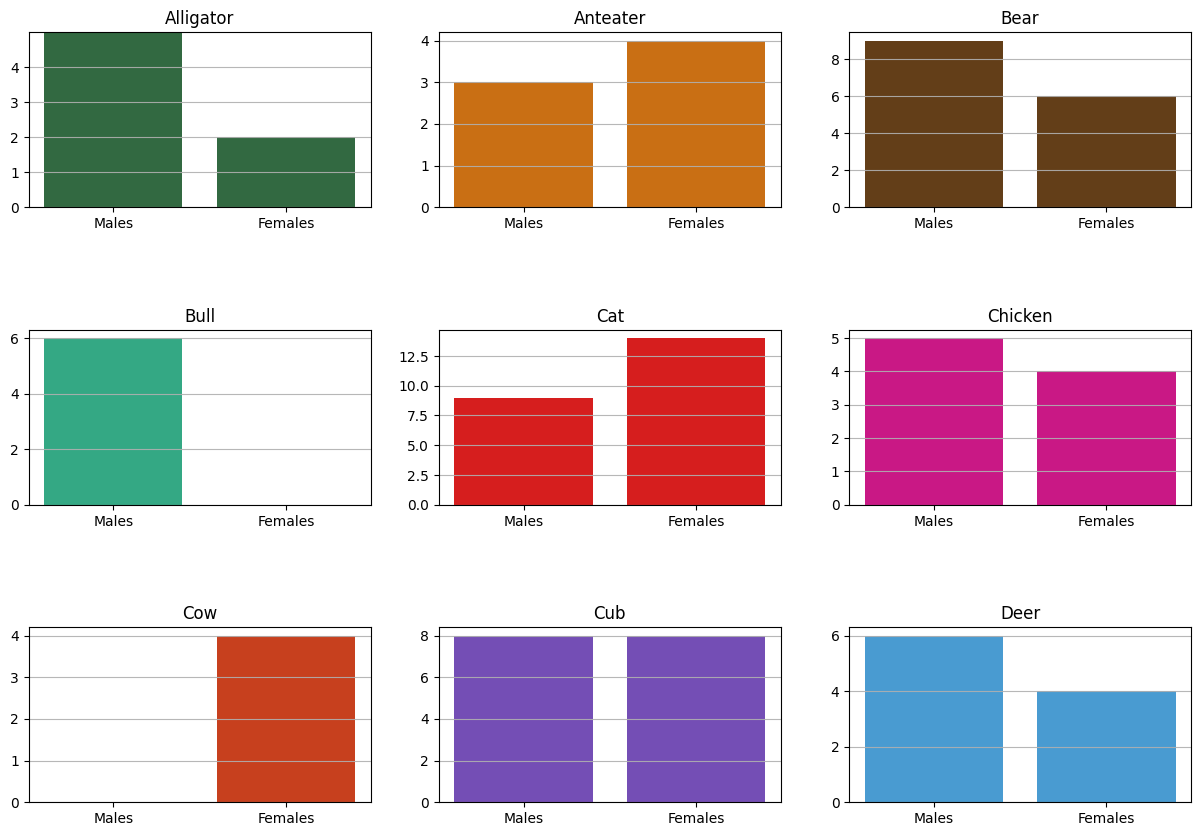

In [113]:
alliDict = {'Males': alligator[alligator['Gender'] == 'Male']['Gender'].count(), 'Females': alligator[alligator['Gender'] == 'Female']['Gender'].count()}
antDict = {'Males': anteater[anteater['Gender'] == 'Male']['Gender'].count(), 'Females': anteater[anteater['Gender'] == 'Female']['Gender'].count()}
bearDict = {'Males': bear[bear['Gender'] == 'Male']['Gender'].count(), "Females": bear[bear['Gender'] == 'Female']['Gender'].count()}
birdDict = {'Males': bird[bird['Gender'] == 'Male']['Gender'].count(), "Females": bird[bird['Gender'] == 'Female']['Gender'].count()}
bullDict = {'Males': bull[bull['Gender'] == 'Male']['Gender'].count(), "Females": bull[bull['Gender'] == 'Female']['Gender'].count()}

catDict = {'Males': cat[cat['Gender'] == 'Male']['Gender'].count(), "Females": cat[cat['Gender'] == 'Female']['Gender'].count()}
chickenDict = {'Males': chicken[chicken['Gender'] == 'Male']['Gender'].count(), "Females": chicken[chicken['Gender'] == 'Female']['Gender'].count()}
cowDict = {'Males': cow[cow['Gender'] == 'Male']['Gender'].count(), "Females": cow[cow['Gender'] == 'Female']['Gender'].count()}
cubDict = {'Males': cub[cub['Gender'] == 'Male']['Gender'].count(), "Females": cub[cub['Gender'] == 'Female']['Gender'].count()}
deerDict = {'Males': deer[deer['Gender'] == 'Male']['Gender'].count(), "Females": deer[deer['Gender'] == 'Female']['Gender'].count()}

dogDict = {'Males': dog[dog['Gender'] == 'Male']['Gender'].count(), "Females": dog[dog['Gender'] == 'Female']['Gender'].count()}
duckDict = {'Males': duck[duck['Gender'] == 'Male']['Gender'].count(), "Females": duck[duck['Gender'] == 'Female']['Gender'].count()}
eagleDict = {'Males': eagle[eagle['Gender'] == 'Male']['Gender'].count(), "Females": eagle[eagle['Gender'] == 'Female']['Gender'].count()}
elephantDict = {'Males': elephant[elephant['Gender'] == 'Male']['Gender'].count(), "Females": elephant[elephant['Gender'] == 'Female']['Gender'].count()}
frogDict = {'Males': frog[frog['Gender'] == 'Male']['Gender'].count(), "Females": frog[frog['Gender'] == 'Female']['Gender'].count()}

goatDict = {'Males': goat[goat['Gender'] == 'Male']['Gender'].count(), "Females": goat[goat['Gender'] == 'Female']['Gender'].count()}
gorillaDict = {'Males': gorilla[gorilla['Gender'] == 'Male']['Gender'].count(), "Females": gorilla[gorilla['Gender'] == 'Female']['Gender'].count()}
hamsterDict = {'Males': hamster[hamster['Gender'] == 'Male']['Gender'].count(), "Females": hamster[hamster['Gender'] == 'Female']['Gender'].count()}
hippoDict = {'Males': hippo[hippo['Gender'] == 'Male']['Gender'].count(), "Females": hippo[hippo['Gender'] == 'Female']['Gender'].count()}
horseDict = {'Males': horse[horse['Gender'] == 'Male']['Gender'].count(), "Females": horse[horse['Gender'] == 'Female']['Gender'].count()}

kangarooDict = {'Males': kangaroo[kangaroo['Gender'] == 'Male']['Gender'].count(), "Females": kangaroo[kangaroo['Gender'] == 'Female']['Gender'].count()}
koalaDict = {'Males': koala[koala['Gender'] == 'Male']['Gender'].count(), "Females": koala[koala['Gender'] == 'Female']['Gender'].count()}
lionDict = {'Males': lion[lion['Gender'] == 'Male']['Gender'].count(), "Females": lion[lion['Gender'] == 'Female']['Gender'].count()}
monkeyDict = {'Males': monkey[monkey['Gender'] == 'Male']['Gender'].count(), "Females": monkey[monkey['Gender'] == 'Female']['Gender'].count()}
mouseDict = {'Males': mouse[mouse['Gender'] == 'Male']['Gender'].count(), "Females": mouse[mouse['Gender'] == 'Female']['Gender'].count()}

octoDict = {'Males': octopus[octopus['Gender'] == 'Male']['Gender'].count(), "Females": octopus[octopus['Gender'] == 'Female']['Gender'].count()}
ostDict = {'Males': ostrich[ostrich['Gender'] == 'Male']['Gender'].count(), "Females": ostrich[ostrich['Gender'] == 'Female']['Gender'].count()}
penDict = {'Males': penguin[penguin['Gender'] == 'Male']['Gender'].count(), "Females": penguin[penguin['Gender'] == 'Female']['Gender'].count()}
pigDict = {'Males': pig[pig['Gender'] == 'Male']['Gender'].count(), "Females": pig[pig['Gender'] == 'Female']['Gender'].count()}
rabbitDict = {'Males': rabbit[rabbit['Gender'] == 'Male']['Gender'].count(), "Females": rabbit[rabbit['Gender'] == 'Female']['Gender'].count()}

rhinoDict = {'Males': rhino[rhino['Gender'] == 'Male']['Gender'].count(), "Females": rhino[rhino['Gender'] == 'Female']['Gender'].count()}
sheepDict = {'Males': sheep[sheep['Gender'] == 'Male']['Gender'].count(), "Females": sheep[sheep['Gender'] == 'Female']['Gender'].count()}
squirrelDict = {'Males': squirrel[squirrel['Gender'] == 'Male']['Gender'].count(), "Females": squirrel[squirrel['Gender'] == 'Female']['Gender'].count()}
tigerDict = {'Males': tiger[tiger['Gender'] == 'Male']['Gender'].count(), "Females": tiger[tiger['Gender'] == 'Female']['Gender'].count()}
wolfDict = {'Males': wolf[wolf['Gender'] == 'Male']['Gender'].count(), "Females": wolf[wolf['Gender'] == 'Female']['Gender'].count()}


plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3, 3, 1)
plt.ylim(0,5)
plt.yticks(range(0,5,1))
plt.grid(axis='y', alpha = 0.9)
plt.title('Alligator')
plt.bar(alliDict.keys(), alliDict.values(), color = species_Color[0])

plt.subplot(3, 3, 2)
plt.grid(axis='y', alpha = 0.9)
plt.title('Anteater')
plt.bar(antDict.keys(), antDict.values(), color = species_Color[1])

plt.subplot(3, 3, 3)
plt.grid(axis='y', alpha = 0.9)
plt.title('Bear')
plt.bar (bearDict.keys(), bearDict.values(), color = species_Color[2])

plt.subplot(3, 3, 4)
plt.grid(axis='y', alpha = 0.9)
plt.title('Bull')
plt.bar(bullDict.keys(), bullDict.values(), color = species_Color[3])

plt.subplot(3, 3, 5)
plt.grid(axis='y', alpha = 0.9)
plt.title('Cat')
plt.bar(catDict.keys(), catDict.values(), color = species_Color[4])

plt.subplot(3, 3, 6)
plt.grid(axis='y', alpha = 0.9)
plt.title('Chicken')
plt.bar(chickenDict.keys(), chickenDict.values(), color = species_Color[5])

plt.subplot(3, 3, 7)
plt.grid(axis='y', alpha = 0.9)
plt.title('Cow')
plt.bar(cowDict.keys(), cowDict.values(), color = species_Color[6])

plt.subplot(3, 3, 8)
plt.grid(axis='y', alpha = 0.9)
plt.title('Cub')
plt.bar(cubDict.keys(), cubDict.values(), color = species_Color[7])

plt.subplot(3, 3, 9)
plt.grid(axis='y', alpha = 0.9)
plt.title('Deer')
plt.bar(deerDict.keys(), deerDict.values(), color = species_Color[8])

<BarContainer object of 2 artists>

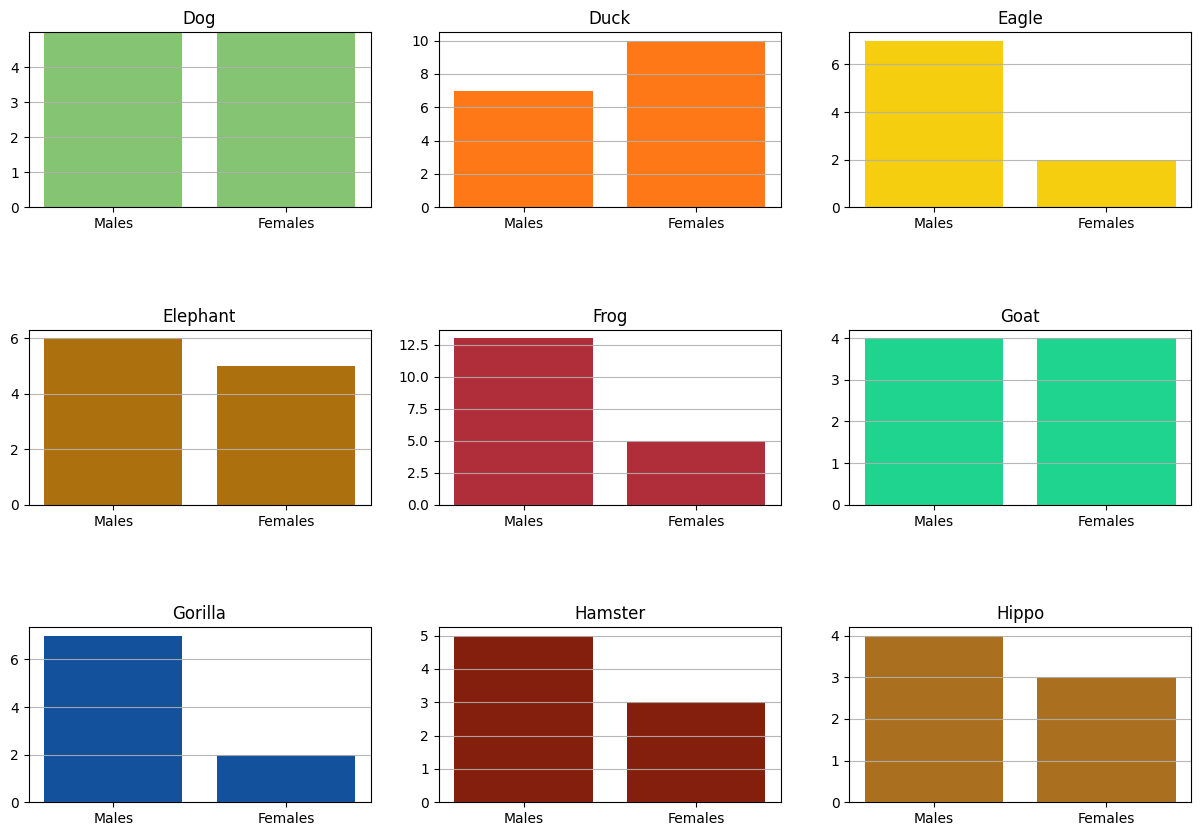

In [114]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3, 3, 1)
plt.ylim(0,5)
plt.yticks(range(0,5,1))
plt.grid(axis='y', alpha = 0.9)
plt.title('Dog')
plt.bar(dogDict.keys(), dogDict.values(), color = species_Color[9])

plt.subplot(3, 3, 2)
plt.grid(axis='y', alpha = 0.9)
plt.title('Duck')
plt.bar(duckDict.keys(), duckDict.values(), color = species_Color[10])

plt.subplot(3, 3, 3)
plt.grid(axis='y', alpha = 0.9)
plt.title('Eagle')
plt.bar(eagleDict.keys(), eagleDict.values(), color = species_Color[11])

plt.subplot(3, 3, 4)
plt.grid(axis='y', alpha = 0.9)
plt.title('Elephant')
plt.bar(elephantDict.keys(), elephantDict.values(), color = species_Color[12])

plt.subplot(3, 3, 5)
plt.grid(axis='y', alpha = 0.9)
plt.title('Frog')
plt.bar(frogDict.keys(), frogDict.values(), color = species_Color[13])

plt.subplot(3, 3, 6)
plt.grid(axis='y', alpha = 0.9)
plt.title('Goat')
plt.bar(goatDict.keys(), goatDict.values(), color = species_Color[14])

plt.subplot(3, 3, 7)
plt.grid(axis='y', alpha = 0.9)
plt.title('Gorilla')
plt.bar(gorillaDict.keys(), gorillaDict.values(), color = species_Color[15])

plt.subplot(3, 3, 8)
plt.grid(axis='y', alpha = 0.9)
plt.title('Hamster')
plt.bar(hamsterDict.keys(), hamsterDict.values(), color = species_Color[16])

plt.subplot(3, 3, 9)
plt.grid(axis='y', alpha = 0.9)
plt.title('Hippo')
plt.bar(hippoDict.keys(), hippoDict.values(), color = species_Color[17])

<BarContainer object of 2 artists>

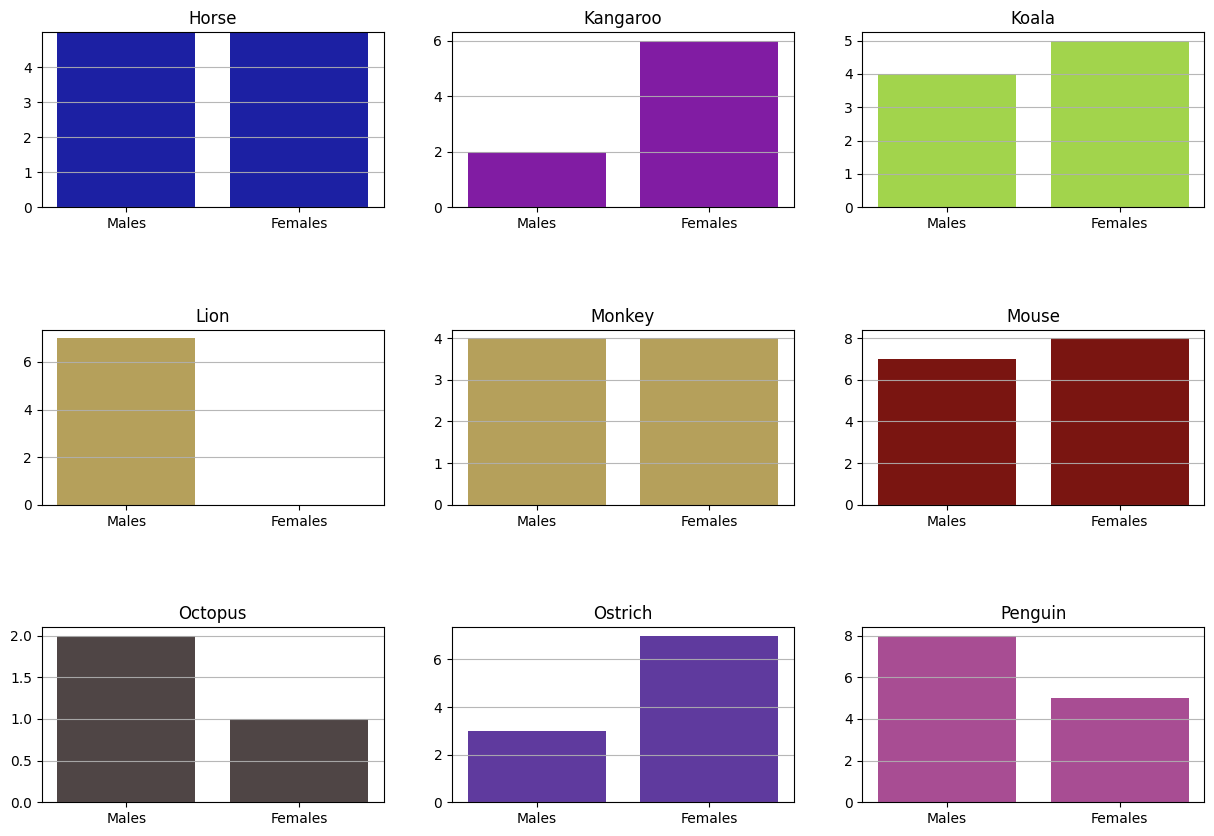

In [115]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3, 3, 1)
plt.ylim(0,5)
plt.yticks(range(0,5,1))
plt.grid(axis='y', alpha = 0.9)
plt.title('Horse')
plt.bar(horseDict.keys(), horseDict.values(), color = species_Color[18])

plt.subplot(3, 3, 2)
plt.grid(axis='y', alpha = 0.9)
plt.title('Kangaroo')
plt.bar(kangarooDict.keys(), kangarooDict.values(), color = species_Color[19])

plt.subplot(3, 3, 3)
plt.grid(axis='y', alpha = 0.9)
plt.title('Koala')
plt.bar(koalaDict.keys(), koalaDict.values(), color = species_Color[20])

plt.subplot(3, 3, 4)
plt.grid(axis='y', alpha = 0.9)
plt.title('Lion')
plt.bar(lionDict.keys(), lionDict.values(), color = species_Color[21])

plt.subplot(3, 3, 5)
plt.grid(axis='y', alpha = 0.9)
plt.title('Monkey')
plt.bar(monkeyDict.keys(), monkeyDict.values(), color = species_Color[22])

plt.subplot(3, 3, 6)
plt.grid(axis='y', alpha = 0.9)
plt.title('Mouse')
plt.bar(mouseDict.keys(), mouseDict.values(), color = species_Color[23])

plt.subplot(3, 3, 7)
plt.grid(axis='y', alpha = 0.9)
plt.title('Octopus')
plt.bar(octoDict.keys(), octoDict.values(), color = species_Color[24])

plt.subplot(3, 3, 8)
plt.grid(axis='y', alpha = 0.9)
plt.title('Ostrich')
plt.bar(ostDict.keys(), ostDict.values(), color = species_Color[25])

plt.subplot(3, 3, 9)
plt.grid(axis='y', alpha = 0.9)
plt.title('Penguin')
plt.bar(penDict.keys(), penDict.values(), color = species_Color[26])

<BarContainer object of 2 artists>

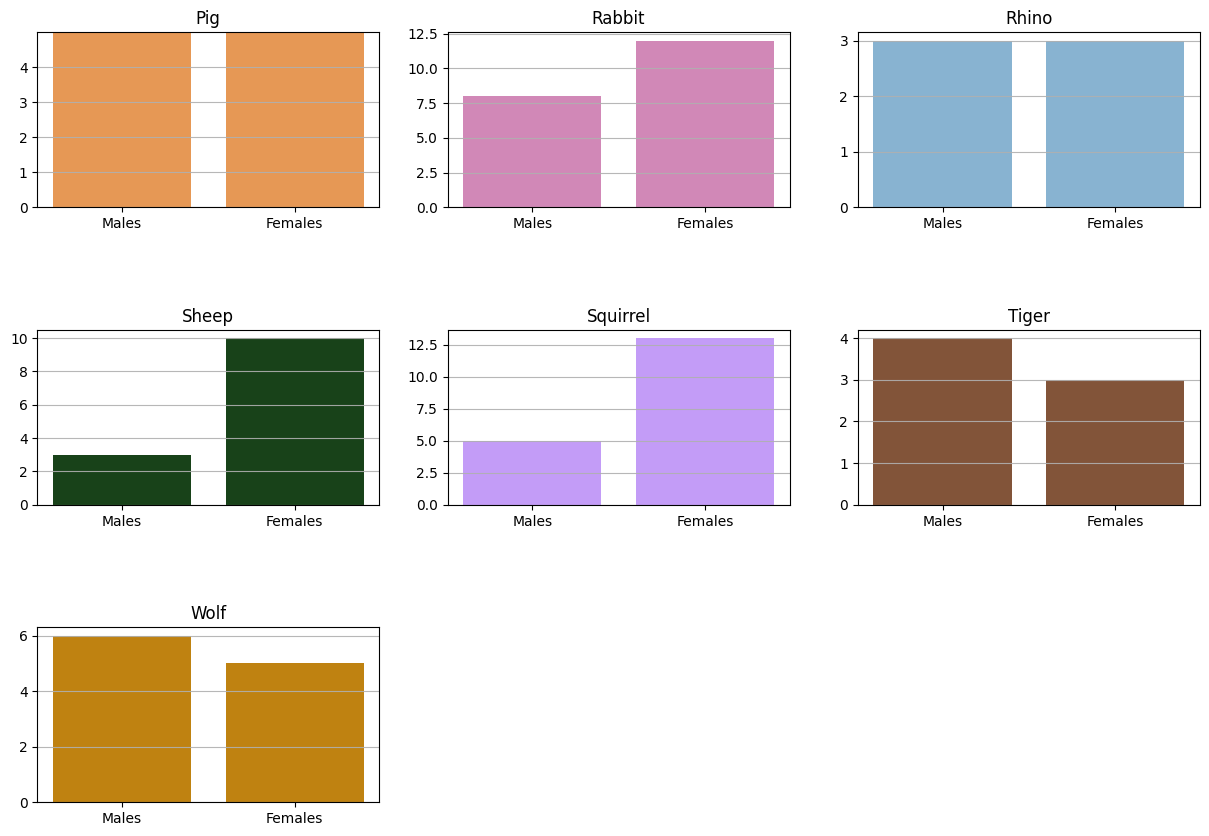

In [116]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3, 3, 1)
plt.ylim(0,5)
plt.yticks(range(0,5,1))
plt.grid(axis='y', alpha = 0.9)
plt.title('Pig')
plt.bar(pigDict.keys(), pigDict.values(), color = species_Color[27])

plt.subplot(3, 3, 2)
plt.grid(axis='y', alpha = 0.9)
plt.title('Rabbit')
plt.bar(rabbitDict.keys(), rabbitDict.values(), color = species_Color[28])

plt.subplot(3, 3, 3)
plt.grid(axis='y', alpha = 0.9)
plt.title('Rhino')
plt.bar(rhinoDict.keys(), rhinoDict.values(), color = species_Color[29])

plt.subplot(3, 3, 4)
plt.grid(axis='y', alpha = 0.9)
plt.title('Sheep')
plt.bar(sheepDict.keys(), sheepDict.values(), color = species_Color[30])

plt.subplot(3, 3, 5)
plt.grid(axis='y', alpha = 0.9)
plt.title('Squirrel')
plt.bar(squirrelDict.keys(), squirrelDict.values(), color = species_Color[31])

plt.subplot(3, 3, 6)
plt.grid(axis='y', alpha = 0.9)
plt.title('Tiger')
plt.bar(tigerDict.keys(), tigerDict.values(), color = species_Color[32])

plt.subplot(3, 3, 7)
plt.grid(axis='y', alpha = 0.9)
plt.title('Wolf')
plt.bar(wolfDict.keys(), wolfDict.values(), color = species_Color[33])

#### **Outcome of 1b:**

We can see from the spread of bar graphs that distribution of male and female villagers in each species are diversely different from the other. It would seem the most common observation is that species have one gender be more then the other by increased small amount. 

Species like the **pigs, rhinos, horses, monkeys, dogs, goats, and cubs** have equal amount of males and females.

Another interesting observation is how the **bull villagers** are exclusively male and the **cow villagers** are exclusively female. 

# 2. What is the most common personality of each species?

Our next main section question how we see the most common personality of each species. In the game, each villager you can talk to and invite to live on your island have their own personality type. The game in total have 8 different personalities that each villager will have. 

So to answer this question, I will create a color array to colorize our bar graphs. Then I will create a series for each of the 35 species that will count how many of each personality type in their species. Finally, I will plot the bar graph for each species to see a full difference. 



Text(0.5, 1.0, 'Wolf')

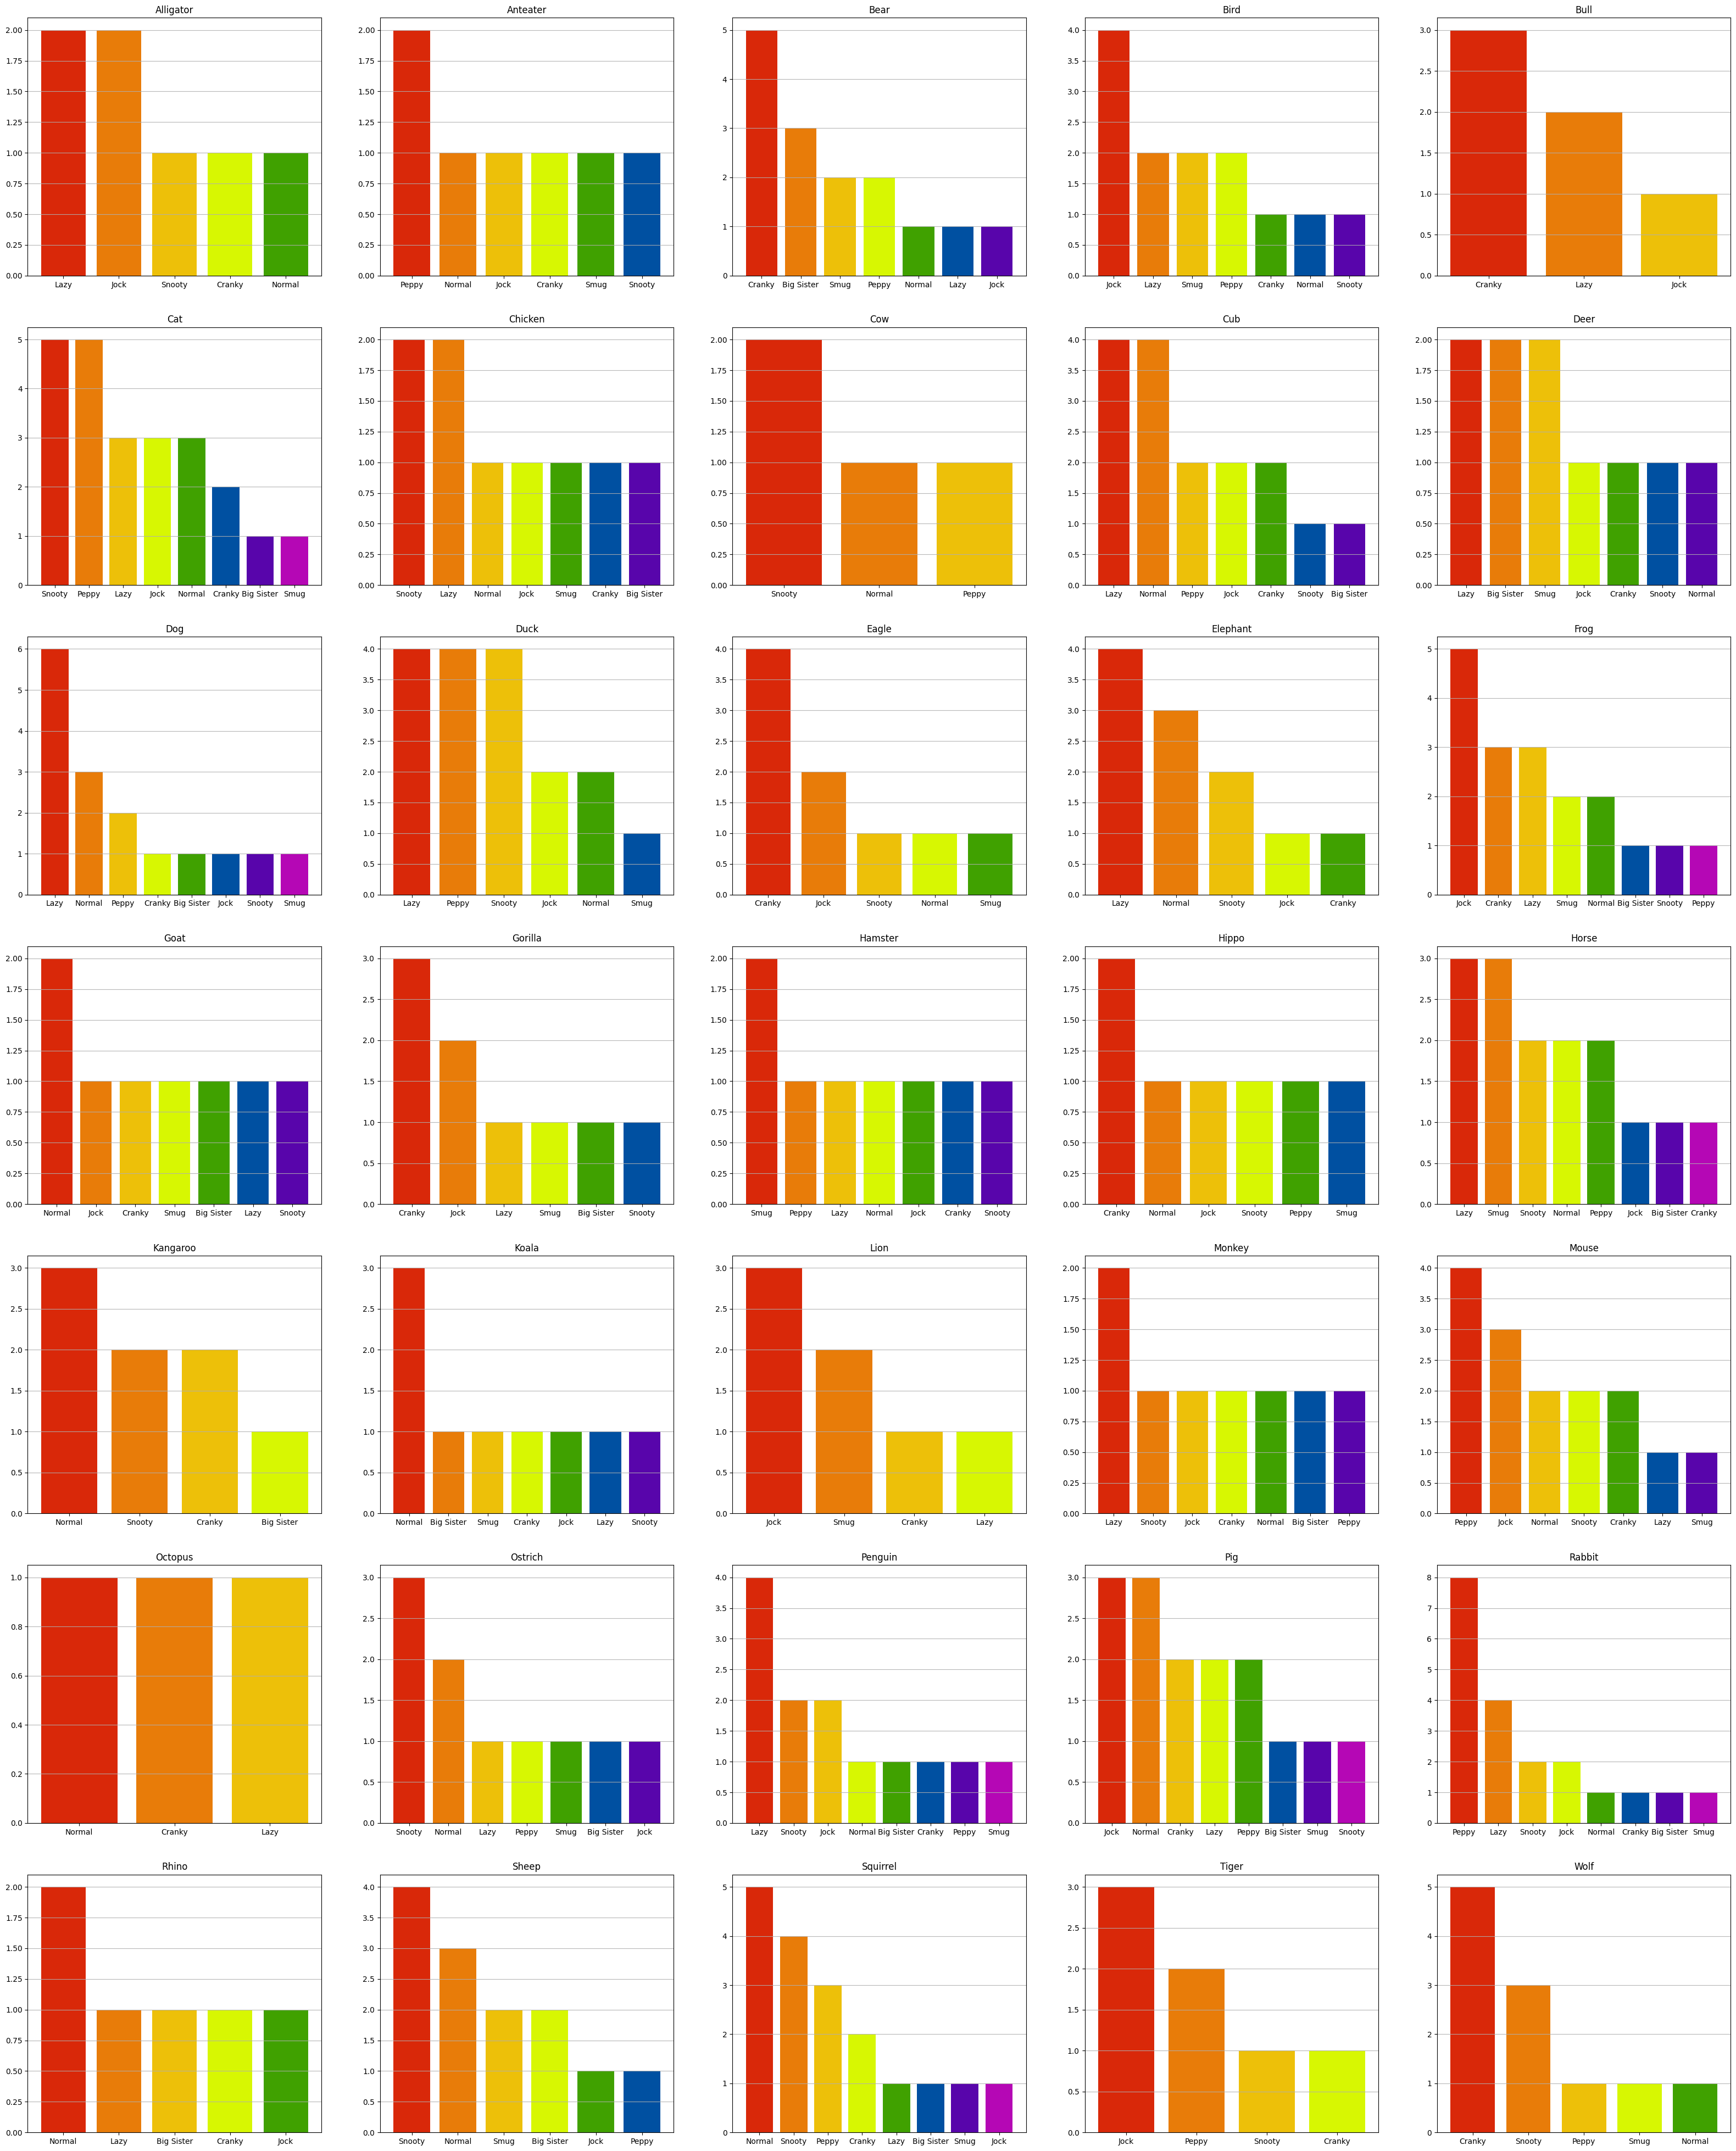

In [125]:
personalityColor = [
    '#d92809', #Lazy
    '#e87c09', #Normal
    '#edc009', #Peppy
    '#d7f702', #Jock
    '#40a100', #Cranky
    '#0050a1', #Snooty
    '#5805ab', #Sisterly
    '#b507b5', #Smug
]

plt.figure(figsize=(40,50))

#1st Row

plt.subplot(7, 5, 1)
alliPerso = pd.Series(alligator['Personality'].value_counts())
plt.grid(axis='y', alpha = 0.9)
plt.bar(alliPerso.index, alliPerso.values, color=personalityColor)
plt.title('Alligator')

plt.subplot(7, 5,  2)
plt.grid(axis='y', alpha = 0.9)
antPerso = pd.Series(anteater['Personality'].value_counts())
plt.bar(antPerso.index, antPerso.values, color=personalityColor)
plt.title('Anteater')

plt.subplot(7, 5, 3)
plt.grid(axis='y', alpha = 0.9)
bearPerso = pd.Series(bear['Personality'].value_counts())
plt.bar(bearPerso.index, bearPerso.values, color=personalityColor)
plt.title('Bear')

plt.subplot(7, 5, 4)
plt.grid(axis='y', alpha = 0.9)
birdPerso = pd.Series(bird['Personality'].value_counts())
plt.bar(birdPerso.index, birdPerso.values, color=personalityColor)
plt.title('Bird')

plt.subplot(7, 5, 5)
plt.grid(axis='y', alpha = 0.9)
bullPerso = pd.Series(bull['Personality'].value_counts())
plt.bar(bullPerso.index, bullPerso.values, color=personalityColor)
plt.title('Bull')

#2nd Row

plt.subplot(7, 5, 6)
plt.grid(axis='y', alpha = 0.9)
catPerso = pd.Series(cat['Personality'].value_counts())
plt.bar(catPerso.index, catPerso.values, color=personalityColor)
plt.title('Cat')

plt.subplot(7, 5, 7)
plt.grid(axis='y', alpha = 0.9)
chickenPerso = pd.Series(chicken['Personality'].value_counts())
plt.bar(chickenPerso.index, chickenPerso.values, color=personalityColor)
plt.title('Chicken')

plt.subplot(7, 5, 8)
plt.grid(axis='y', alpha = 0.9)
cowPerso = pd.Series(cow['Personality'].value_counts())
plt.bar(cowPerso.index, cowPerso.values, color=personalityColor)
plt.title('Cow')

plt.subplot(7, 5, 9)
plt.grid(axis='y', alpha = 0.9)
cubPerso = pd.Series(cub['Personality'].value_counts())
plt.bar(cubPerso.index, cubPerso.values, color=personalityColor)
plt.title('Cub')

plt.subplot(7, 5, (10))
plt.grid(axis='y', alpha = 0.9)
deerPerso = pd.Series(deer['Personality'].value_counts())
plt.bar(deerPerso.index, deerPerso.values, color=personalityColor)
plt.title('Deer')

#3rd Row

plt.subplot(7, 5, (11))
plt.grid(axis='y', alpha = 0.9)
dogPerso = pd.Series(dog['Personality'].value_counts())
plt.bar(dogPerso.index, dogPerso.values, color=personalityColor)
plt.title('Dog')

plt.subplot(7, 5, (12))
plt.grid(axis='y', alpha = 0.9)
duckPerso = pd.Series(duck['Personality'].value_counts())
plt.bar(duckPerso.index, duckPerso.values, color=personalityColor)
plt.title('Duck')

plt.subplot(7, 5, (13))
plt.grid(axis='y', alpha = 0.9)
eaglePerso = pd.Series(eagle['Personality'].value_counts())
plt.bar(eaglePerso.index, eaglePerso.values, color=personalityColor)
plt.title('Eagle')

plt.subplot(7, 5, (14))
plt.grid(axis='y', alpha = 0.9)
elephantPerso = pd.Series(elephant['Personality'].value_counts())
plt.bar(elephantPerso.index, elephantPerso.values, color=personalityColor)
plt.title('Elephant')

plt.subplot(7, 5, (15))
plt.grid(axis='y', alpha = 0.9)
frogPerso = pd.Series(frog['Personality'].value_counts())
plt.bar(frogPerso.index, frogPerso.values, color=personalityColor)
plt.title('Frog')

#4th Row

plt.subplot(7, 5, (16))
plt.grid(axis='y', alpha = 0.9)
goatPerso = pd.Series(goat['Personality'].value_counts())
plt.bar(goatPerso.index, goatPerso.values, color=personalityColor)
plt.title('Goat')

plt.subplot(7, 5, (17))
plt.grid(axis='y', alpha = 0.9)
gorillaPerso = pd.Series(gorilla['Personality'].value_counts())
plt.bar(gorillaPerso.index, gorillaPerso.values, color=personalityColor)
plt.title('Gorilla')

plt.subplot(7, 5, (18))
plt.grid(axis='y', alpha = 0.9)
hamPerso = pd.Series(hamster['Personality'].value_counts())
plt.bar(hamPerso.index, hamPerso.values, color=personalityColor)
plt.title('Hamster')

plt.subplot(7, 5, (19))
plt.grid(axis='y', alpha = 0.9)
hippoPerso = pd.Series(hippo['Personality'].value_counts())
plt.bar(hippoPerso.index, hippoPerso.values, color=personalityColor)
plt.title('Hippo')

plt.subplot(7, 5, (20))
plt.grid(axis='y', alpha = 0.9)
horsePerso = pd.Series(horse['Personality'].value_counts())
plt.bar(horsePerso.index, horsePerso.values, color=personalityColor)
plt.title('Horse')

#5th Row

plt.subplot(7, 5, (21))
plt.grid(axis='y', alpha = 0.9)
kangPerso = pd.Series(kangaroo['Personality'].value_counts())
plt.bar(kangPerso.index, kangPerso.values, color=personalityColor)
plt.title('Kangaroo')

plt.subplot(7, 5, (22))
plt.grid(axis='y', alpha = 0.9)
koalaPerso = pd.Series(koala['Personality'].value_counts())
plt.bar(koalaPerso.index, koalaPerso.values, color=personalityColor)
plt.title('Koala')

plt.subplot(7, 5, (23))
plt.grid(axis='y', alpha = 0.9)
lionPerso = pd.Series(lion['Personality'].value_counts())
plt.bar(lionPerso.index, lionPerso.values, color=personalityColor)
plt.title('Lion')

plt.subplot(7, 5, (24))
plt.grid(axis='y', alpha = 0.9)
monkPerso = pd.Series(monkey['Personality'].value_counts())
plt.bar(monkPerso.index, monkPerso.values, color=personalityColor)
plt.title('Monkey')

plt.subplot(7, 5, (25))
plt.grid(axis='y', alpha = 0.9)
mousePerso = pd.Series(mouse['Personality'].value_counts())
plt.bar(mousePerso.index, mousePerso.values, color=personalityColor)
plt.title('Mouse')

#6th Row

plt.subplot(7, 5, (26))
plt.grid(axis='y', alpha = 0.9)
octoPerso = pd.Series(octopus['Personality'].value_counts())
plt.bar(octoPerso.index, octoPerso.values, color=personalityColor)
plt.title('Octopus')

plt.subplot(7, 5, (27))
plt.grid(axis='y', alpha = 0.9)
ostPerso = pd.Series(ostrich['Personality'].value_counts())
plt.bar(ostPerso.index, ostPerso.values, color=personalityColor)
plt.title('Ostrich')

plt.subplot(7, 5, (28))
plt.grid(axis='y', alpha = 0.9)
penPerso = pd.Series(penguin['Personality'].value_counts())
plt.bar(penPerso.index, penPerso.values, color=personalityColor)
plt.title('Penguin')

plt.subplot(7, 5, (29))
plt.grid(axis='y', alpha = 0.9)
pigPerso = pd.Series(pig['Personality'].value_counts())
plt.bar(pigPerso.index, pigPerso.values, color=personalityColor)
plt.title('Pig')

plt.subplot(7, 5, (30))
plt.grid(axis='y', alpha = 0.9)
rabbitPerso = pd.Series(rabbit['Personality'].value_counts())
plt.bar(rabbitPerso.index, rabbitPerso.values, color=personalityColor)
plt.title('Rabbit')

#7th Row

plt.subplot(7, 5, (31))
plt.grid(axis='y', alpha = 0.9)
rhinoPerso = pd.Series(rhino['Personality'].value_counts())
plt.bar(rhinoPerso.index, rhinoPerso.values, color=personalityColor)
plt.title('Rhino')

plt.subplot(7, 5, (32))
plt.grid(axis='y', alpha = 0.9)
sheepPerso = pd.Series(sheep['Personality'].value_counts())
plt.bar(sheepPerso.index, sheepPerso.values, color=personalityColor)
plt.title('Sheep')

plt.subplot(7, 5, (33))
plt.grid(axis='y', alpha = 0.9)
squirrelPerso = pd.Series(squirrel['Personality'].value_counts())
plt.bar(squirrelPerso.index, squirrelPerso.values, color=personalityColor)
plt.title('Squirrel')

plt.subplot(7, 5, (34))
plt.grid(axis='y', alpha = 0.9)
tigerPerso = pd.Series(tiger['Personality'].value_counts())
plt.bar(tigerPerso.index, tigerPerso.values, color=personalityColor)
plt.title('Tiger')

plt.subplot(7, 5, (35))
plt.grid(axis='y', alpha = 0.9)
wolfPerso = pd.Series(wolf['Personality'].value_counts())
plt.bar(wolfPerso.index, wolfPerso.values, color=personalityColor)
plt.title('Wolf')


#### **Outcome of 2:**

Across the the distribution of the graphs, again we see some variety between each of them. Not every species member posses every 8 personality types. The species that has at least one villager for each personality type are the **cats, dogs, frogs, horses, penguins, pigs, rabbits, and squirrels**. 

We can also see that majority of the rest of the species present don't have all of the personality types. This is most likely due to the total size count of each species, so each personality type will not be met. 

#### **2a. What is the total number of villagers in each personality type**

Our first sub question of part 2 is to see what is the total number of villagers in each personality type in the dataset. We can find this in similar fashion to our overall question in part 2 by using a dictionary that will hold the total count for each personality type. Then we can make bar graph using our dictionary. 

Text(0.5, 1.0, 'Total number of villagers in each personality type')

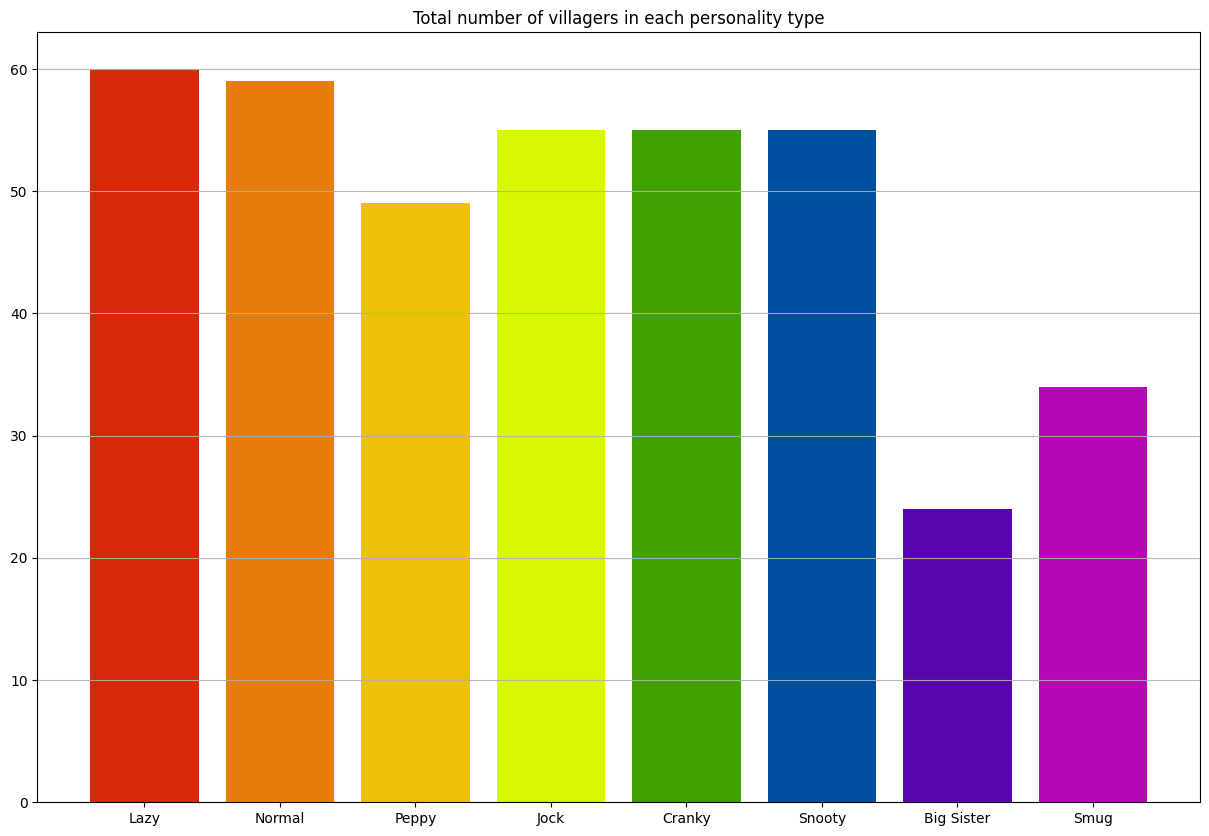

In [118]:
personalityDict = {
    'Lazy': villagers[villagers['Personality'] == "Lazy"].count()[0],
    'Normal': villagers[villagers['Personality'] == "Normal"].count()[0],
    'Peppy': villagers[villagers['Personality'] == "Peppy"].count()[0],
    'Jock': villagers[villagers['Personality'] == "Jock"].count()[0],
    'Cranky': villagers[villagers['Personality'] == "Cranky"].count()[0],
    'Snooty': villagers[villagers['Personality'] == "Snooty"].count()[0],
    'Big Sister': villagers[villagers['Personality'] == "Big Sister"].count()[0],
    'Smug': villagers[villagers['Personality'] == "Smug"].count()[0]
}

plt.figure(figsize=(15,10))
plt.grid(axis='y', alpha = 0.9)
plt.bar(personalityDict.keys(), personalityDict.values(), color=personalityColor)
plt.title('Total number of villagers in each personality type')


#### **Outcome of 2a:**

From our graph, **lazy villagers** are the most abundant in our dataset and in the game! 

A interesting oberservation from this graph is how **jock, cranky, and snooty villagers** have equal amount of villagers in the dataset. 

#### **2b. Which species has the highest count of each personality type**

Our final question to answer in part 2 is how we can find which species has the highest count of each personality type. To do this, I will use pandas to do some boolean indexing for each personality type while also using mode to find the species with the highest count.

In [119]:
lazy = villagers[villagers['Personality'] == "Lazy"]['Species'].mode()[0]
normal = villagers[villagers['Personality'] == "Normal"]['Species'].mode()[0]
peppy = villagers[villagers['Personality'] == "Peppy"]['Species'].mode()[0]
jock = villagers[villagers['Personality'] == "Jock"]['Species'].mode()[0]
cranky = villagers[villagers['Personality'] == "Cranky"]['Species'].mode()[0]
snooty= villagers[villagers['Personality'] == "Snooty"]['Species'].mode()[0]
bigSister = villagers[villagers['Personality'] == "Big Sister"]['Species'].mode()[0]
smug = villagers[villagers['Personality'] == "Smug"]['Species'].mode()[0]

print("The", lazy, "villagers are the most common for the Lazy personality")
print("The", normal, "villagers are the most common for the Normal personality") 
print("The", peppy, "villagers are the most common for the Peppy personality")
print("The", jock, "villagers are the most common for the Jock personality")
print("The", cranky, "villagers are the most common for the Cranky personality")
print("The", snooty, "villagers are the most common for the Snooty personality")
print("The", bigSister, "villagers are the most common for the Big Sister personality")
print("The", smug, "villagers are the most common for the Smug personality")


The Dog villagers are the most common for the Lazy personality
The Squirrel villagers are the most common for the Normal personality
The Rabbit villagers are the most common for the Peppy personality
The Frog villagers are the most common for the Jock personality
The Bear villagers are the most common for the Cranky personality
The Cat villagers are the most common for the Snooty personality
The Bear villagers are the most common for the Big Sister personality
The Horse villagers are the most common for the Smug personality


#### **Outcome of 2b:**

From our results we can see what villagers are most common for each personality. I think a funny observation is that dogs are the most common for the lazy personality, because of the term "Lazy Dog". 

# 3. What is the most common hobby for each species?

For our last section out main question is how we can find the most common hobby for each species. Like personality types, each villager has a hobby assign to them. There's 6 different hobbies in the game and the villagers can display their hobby by doing different activities around the player's island. This includes changing their outfits into fitness apparel and doing some stretching or workouts, or equipping a study book and magnifying glass to observe flowers, bugs, and fossils. 

I feel there's no need to make graphs for this final section so to answer, I will use some indexing techniques using mode to find the most common species for each villager species. I will also separate the print statements so the program is able to print each line properly. 

In [120]:
print('The most common hobby for the alligator villagers is', alligator['Hobby'].mode()[0])
print('The most common hobby for the anteater villagers is', anteater['Hobby'].mode()[0])
print('The most common hobby for the bear villagers is', bear['Hobby'].mode()[0])
print('The most common hobby for the bird villagers is', bird['Hobby'].mode()[0])
print('The most common hobby for the bull villagers is', bull['Hobby'].mode()[0])
print('The most common hobby for the cat villagers is',cat['Hobby'].mode()[0])
print('The most common hobby for the chicken villagers is',chicken['Hobby'].mode()[0])
print('The most common hobby for the cow villagers is',cow['Hobby'].mode()[0])
print('The most common hobby for the cub villagers is',cub['Hobby'].mode()[0])
print('The most common hobby for the deer villagers is',deer['Hobby'].mode()[0])
print('The most common hobby for the dog villagers is',dog['Hobby'].mode()[0])
print('The most common hobby for the duck villagers is',duck['Hobby'].mode()[0])
print('The most common hobby for the eagle villagers is',eagle['Hobby'].mode()[0])
print('The most common hobby for the elephant villagers is',elephant['Hobby'].mode()[0])
print('The most common hobby for the frog villagers is',frog['Hobby'].mode()[0])
print('The most common hobby for the goat villagers is',goat['Hobby'].mode()[0])
print('The most common hobby for the gorilla villagers is',gorilla['Hobby'].mode()[0])


The most common hobby for the alligator villagers is Play
The most common hobby for the anteater villagers is Education
The most common hobby for the bear villagers is Fitness
The most common hobby for the bird villagers is Play
The most common hobby for the bull villagers is Fitness
The most common hobby for the cat villagers is Music
The most common hobby for the chicken villagers is Music
The most common hobby for the cow villagers is Fashion
The most common hobby for the cub villagers is Play
The most common hobby for the deer villagers is Nature
The most common hobby for the dog villagers is Play
The most common hobby for the duck villagers is Fashion
The most common hobby for the eagle villagers is Music
The most common hobby for the elephant villagers is Nature
The most common hobby for the frog villagers is Fitness
The most common hobby for the goat villagers is Education
The most common hobby for the gorilla villagers is Fitness


In [121]:
print('The most common hobby for the hamster villagers is',hamster['Hobby'].mode()[0])
print('The most common hobby for the hippo villagers is',hippo['Hobby'].mode()[0])
print('The most common hobby for the horse villagers is',horse['Hobby'].mode()[0])
print('The most common hobby for the kangaroo villagers is',kangaroo['Hobby'].mode()[0])
print('The most common hobby for the koala villagers is',koala['Hobby'].mode()[0])
print('The most common hobby for the lion villagers is',lion['Hobby'].mode()[0])
print('The most common hobby for the monkey villagers is',monkey['Hobby'].mode()[0])
print('The most common hobby for the mouse villagers is',mouse['Hobby'].mode()[0])
print('The most common hobby for the octopus villagers is',octopus['Hobby'].mode()[0])
print('The most common hobby for the ostrich villagers is',ostrich['Hobby'].mode()[0])
print('The most common hobby for the penguin villagers is',penguin['Hobby'].mode()[0])
print('The most common hobby for the pig villagers is',pig['Hobby'].mode()[0])
print('The most common hobby for the rabbit villagers is',rabbit['Hobby'].mode()[0])
print('The most common hobby for the rhino villagers is',rhino['Hobby'].mode()[0])
print('The most common hobby for the sheep villagers is',sheep['Hobby'].mode()[0])
print('The most common hobby for the squirrel villagers is',squirrel['Hobby'].mode()[0])
print('The most common hobby for the tiger villagers is',tiger['Hobby'].mode()[0])
print('The most common hobby for the wolf villagers is',wolf['Hobby'].mode()[0])

The most common hobby for the hamster villagers is Nature
The most common hobby for the hippo villagers is Education
The most common hobby for the horse villagers is Music
The most common hobby for the kangaroo villagers is Fitness
The most common hobby for the koala villagers is Play
The most common hobby for the lion villagers is Education
The most common hobby for the monkey villagers is Education
The most common hobby for the mouse villagers is Education
The most common hobby for the octopus villagers is Music
The most common hobby for the ostrich villagers is Nature
The most common hobby for the penguin villagers is Fitness
The most common hobby for the pig villagers is Play
The most common hobby for the rabbit villagers is Fashion
The most common hobby for the rhino villagers is Nature
The most common hobby for the sheep villagers is Fashion
The most common hobby for the squirrel villagers is Fashion
The most common hobby for the tiger villagers is Fitness
The most common hobby f

#### **Outcome of 3:**

After printing out all the results, lets try to analyze each section of the printed statements. In the first section we can see that the play and fitness hobbies are the most common among this group. Nature, education, and fashion are the least common hobbies in this group. 

In the second section, the most common hobby in this section is the education hobby. The least common hobbies are the music and play hobbies. 

From this, result it makes me curious as to why when I decided to split the print statements we were able to see a clear difference between hobbies of the villager species.

#### **3a. What villagers species were the most common in total for each hobby in the game

For section 3a, this was added when I was completing section 3 actually. I wanted to see what villager species were the most common in total for each hobby type. Again, I felt no need to make a graph so I will do another round of boolean indexing to do some print statement.


In [122]:
education = villagers[villagers['Hobby'] == "Education"]['Species'].mode()[0]
fashion = villagers[villagers['Hobby'] == "Fashion"]['Species'].mode()[0] 
fitness = villagers[villagers['Hobby'] == "Fitness"]['Species'].mode()[0] 
music = villagers[villagers['Hobby'] == "Music"]['Species'].mode()[0]
nature = villagers[villagers['Hobby'] == "Nature"]['Species'].mode()[0]
play = villagers[villagers['Hobby'] == "Play"]['Species'].mode()[0]


print("The", education, "villagers are the most common for the education hobby")
print("The", fashion, "villagers are the most common for the fashion hobby")
print("The", fitness, "villagers are the most common for the fitness hobby")
print("The", music, "villagers are the most common for the music hobby")
print("The", nature, "villagers are the most common for the nature hobby")
print("The", play, "villagers are the most common for the play hobby")


The Hippo villagers are the most common for the education hobby
The Rabbit villagers are the most common for the fashion hobby
The Gorilla villagers are the most common for the fitness hobby
The Cat villagers are the most common for the music hobby
The Rabbit villagers are the most common for the nature hobby
The Cub villagers are the most common for the play hobby


#### **Outcome of 3a**:

So after printing out the results we can see who is the most common species for each hobby. I think as a personal observation is that cat villagers have always appeared in the total calculations in hobby and personality because they have the biggest villager size. 

# Conclusion


Now that we have answered our major questions, I think it's time for us to do a recap of what we found and do some conclusions of this dataset.

* **Cat villagers are the most abundant species**. As someone who played the franchise and interacted with other players in the fanbase, a lot of players like the cat villagers the most. It may be because of they own a pet cat at home or just really love cats. Also with the developers providing with 23 different cat villagers of different hobbies and personality, the fan base can choose up 10 of their favorite to invite to their island. Personally, I only had about 2 cat villagers on my island before and think I got lucky, they are pretty cute. 

* **The lazy personality is the most common personality among the villagers**. This was really funny for me because I thought it would be normal or the jock personality of types since, the villager's dialogue with these personality types give the player I guess more of a energetic tone when interacting with the player and other villagers. But at the same time, the lazy villagers are really sweet. 

* **Noting the amount of species that have equal amount of male and females as well to species that only have males or females**. Again, as I mentioned before in section 1b. I was really interested in seeing the difference between the male and female ratio in the species. It does make sense for the case for the bull and cow villagers since there is a gender difference between the species I just never took notice when playing the game. 

Overall, I had a lot of fun doing this project! I thought it awesome that I was able to use data relating to one of my favorite games on the Nintendo Switch and really take a stab at using what I learned during this semester to make some conclusions about the villagers in Animal Crossing. Especially, learning more on how to use matplotlib to make more detail graphs! I do want to revisit this project again soon to see what else I can possibly pull about these villagers. Maybe I can make a open-source poll in one of communities I follow for animal crossing to see what villager species they like the most and see how their response can create more questions for me to answer or how it may answer some the conclusions I found in this project. 